# Ejercicios de probabilidad

## Ejercicio 1 

Dos dados se lanzan una vez y se observa el total obtenido. Usa una simulación para encontrar la probabilidad estimada de que la puntuación sea mayor a 7 o un número par. Una simulación es una repetición del mismo experimento multiples veces para observar su comportamiento:

- Ejecuta el experimento 1000 veces (lanza 2 dados 1000 veces, y suma el número de ambos dados).
- Lleva ua cuenta de los números y las veces que la suma fue mayor a 7 o un número par.
- Divide el número del paso 2 entre el número de iteraciones(1000).

In [4]:

import random as rd 

#Definimos una funcion def tiradas() que simulara la tirada de dos dados con un input que permite ajustar el numero de tiradas que queremos simular
 
def tiradas(n_tiradas):

  #-definimos una variable "evento" que representara el numero de veces que el resultado de la tirada ha sido mayor que 7 o PAR.###

  evento_count = 0

  #el bucle  for simula las tiradas de dados en el rango dado por el input n_tiradas

  for tirada in range(n_tiradas):
    dado1 = rd.randint(1,6)                           #definimos el primer dado
    dado2 = rd.randint(1,6)                           #definimos el segundo dado

    if dado1 + dado2 > 7 or (dado1 + dado2) % 2 == 0:     #condicional que filtra los eventos 
        evento_count += 1                             #contador de eventos filtrados por el condicional

  #Una vez ejecutada la funcion calculamos la probabilidad del evento e imprimimos ambos resultados
              
  probabilidad_evento = evento_count / n_tiradas      #calculo de la probabilidad del evento

  print(f'el evento buscado se ha producido {evento_count} veces  por lo que su probabilidad es del {probabilidad_evento*100}%')

n_tiradas = int(input('cuantas veces quieres tirar los dados?'))

tiradas(n_tiradas)
 


el evento buscado se ha producido 3288 veces  por lo que su probabilidad es del 65.75999999999999%


## Ejercicio 2

Una caja contiene 10 bolas blancas, 20 bolas rojas y 30 bolas verdes. Si tomamos 5 bolas de la caja reemplazándolas (tomando una bola, anotando el color y luego regresandola a la caja). Queremos saber la probabilidad de:

1. Tomar 3 blancas y 2 rojas.
2. Toas todas del mismo color.

Ejecuta el experimento 1000 veces y calcula las probabilidades que mencionadas.

In [15]:
        
import numpy as np 


ball_box = {}

# Crea la cajas con las bolas
for i in range(60):
    if i < 10:
        ball_box[i] = "White"
    elif (i > 9) and (i < 30):
        ball_box[i] = "Red"
    else:
        ball_box[i] = "Green"
contador_eventos_buscados = 0

#definimos variables donde almacenar los resultados esperados
white3_red2 = 0
all_same = 0

#definimos un input para establecer el numero de veces que queremos repetir el test completo
num_tests = int(input('cuantas veces quieres repetir el experimento?'))

#definimos un blucle para repetir el test tantas veces como queramos // se hace uso de 'for _ in' porque solo se busca repetir un proceso. no se busca iterar sobre nada en concreto
for _ in range(num_tests):
  
  #dentro del bucle definimos una lista que almacenara los resultados de cada bola sacada en cada iteracion del siguiente bucle for
  catch_result = []

  #definimos un segundo bucle para seleccionar 5 bolas (que se repetira num_test veces _ ver bucle for anterior)
  for _ in range(5):                                            #los siguientes dos comandos se repetiran 5 veces (sacar 5 bolas y almacenar sus colores)
      catch = ball_box[rd.choice(list(ball_box.keys()))]        #variable catch almacena color extraido
      catch_result.append(catch)                                #se añade ese resultado a catch_result

  #depues de sacar 5 bolas de la caja revisamos los resultados 
  if catch_result.count('Red') == 5 or catch_result.count('Green') == 5 or catch_result.count('White') == 5:   
    all_same += 1                                                                   #condicional: si las 5 bolas son del mismo color variable contador all_same añade 1
  elif catch_result.count('Red') == 2 and catch_result.count('White') == 3:
    white3_red2 += 1                                                                #segundo condicional: si hay dos rojas y tres blancas variable white3_red2 añade 1

#finaliza el primer bucle for que se ha repetido n_test veces 
    
    
#calculamos la probabilidad 'empirica' de ambos eventos dividiendo las veces que se ha producido el evento entre el numero de veces que se ha hecho el test
prob_all_same = all_same / num_tests  
prob_white3_red2 = white3_red2 / num_tests  


# se imprimen los resultados // la probabilidad obtenia se multiplica por 100 para mostrarla en tanto por cien (mas intuitivo en general)

print(f'''Eventos de todas las bolas del mismo color: se ha repetido {all_same} veces de {num_tests} 
por lo que su probabilidad es del {prob_all_same*100}%''')

print(f'''Eventos de 3 blancas y 2 rojas: se ha repetido {white3_red2} veces de {num_tests} 
por lo que su probabilidad es del {prob_white3_red2*100}%''')


            


Eventos de todas las bolas del mismo color: se ha repetido 170 veces de 5000 
por lo que su probabilidad es del 3.4000000000000004%
Eventos de 3 blancas y 2 rojas: se ha repetido 26 veces de 5000 
por lo que su probabilidad es del 0.52%


### Ejercicio 3

Me lo saco de la manga: es una practica con una base de datos obtenida en kaggle relativa a la incidencia de diabetes en una muestra de unas 250000 personas.

1. Se hallan probabilidades de tener diabetes, colesterol alto y alto IMC
2. Se calcula la probabilidad bayesiana de tener diabetes si se tiene colesterol alto y alto IMC
3. Se usa el metodo Bootstrap para encontrar los valores de confianza del dato promedio de IMC en personas diabeticas.
4. Se grafican los resultados

Nota:
1. El Dataset Esta normalizado:
1. No_diabeticos = 0 / prediabeticos = 1 / diabeticos confirmados = 2
1. Colesterol alto(HighCol = 1)

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl

'''Se importa el dataset normalizado: diabeticos = 2, prediabeticos = 1, colesterol alto = 1, etc...
(No te dejaba importar el dataset pero encontraste en internet que colocando
esa 'r' al principio de la ruta se resolvia el problema)'''

diabetes1_df = pd.read_csv(r"C:\Users\dgose\Downloads\diabetes_csv\diabetes_012_health_indicators_BRFSS2015.csv")


#Imprimimos los 10 primeros para ver la estructura del dataset
diabetes1_df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [7]:

#Se filtra el dataset para obtener el subconjunto de personas diabeticas y de personas 'sanas'
hasdiab_df = diabetes1_df[diabetes1_df['Diabetes_012']== 2]
nodiab_df = diabetes1_df[diabetes1_df['Diabetes_012']== 0]

#Se calcula la probabilidad de tener diabetes , colesterol alto y IMC alto en base al dataset original
prob_diab = (diabetes1_df['Diabetes_012'] == 2).mean()
prob_highchol = (diabetes1_df['HighChol'] == 1).mean()
prob_bmi_25plus = (diabetes1_df['BMI'] > 25).mean()

#se calcula la probabilidad de tener el colesterol alto si diabetes=True
prob_highchol_diab = (hasdiab_df['HighChol'] == 1).mean()

#se calcula la probabilidad de tener IMC alto si diabetes=True
prob_highbmi_diab = (hasdiab_df['BMI'] > 25).mean()

#Se imprimen las conclusiones // probabilidades - tamaño de muestras de datos // 
print(f'''La probabilidad de tener diabetes en general es de {prob_diab*100: .2f}%
La probabilidad de tener colesterol alto es de {prob_highchol*100: .2f} %
La probabilidad de tener el indice de masa corporal alto es de {prob_bmi_25plus*100: .2f}. % 
En la muestra hay {len(hasdiab_df)} personas con diabetes confirmada y 
{len(nodiab_df)} personas libres de diabetes.''')

La probabilidad de tener diabetes en general es de  13.93%
La probabilidad de tener colesterol alto es de  42.41 %
La probabilidad de tener el indice de masa corporal alto es de  64.83. % 
En la muestra hay 35346 personas con diabetes confirmada y 
213703 personas libres de diabetes.


In [12]:
#hallamos probabilidades conjuntas necesarias para la probabilidad Bayesiana
prob_conjunta_HighcolHighbmi = ((diabetes1_df['HighChol'] == 1)&(diabetes1_df['BMI']>25)).mean()   #prob conjunta colesterolAlto+IMC_Alto entre toda la muestra
prob_conjunta_HighcolHighbmi_diab = ((hasdiab_df['HighChol'] == 1)&(hasdiab_df['BMI']>25)).mean()  #prob conjunta colesterolAlto+IMC_Alto entre los diabeticos
prob_conjunta_HighcolHighbmi_diab
print(f'La probabilidad de tener colesterol alto + indice de masa corporal alto es de {prob_conjunta_HighcolHighbmi*100: .2f} %')
print(f'La probabilidad de tener diabetes + colesterol alto + indice de masa corporal alto es de {prob_conjunta_HighcolHighbmi_diab *100: .2f} %')

La probabilidad de tener colesterol alto + indice de masa corporal alto es de  30.48 %
La probabilidad de tener diabetes + colesterol alto + indice de masa corporal alto es de  57.17 %


In [9]:
#se aplica el teorema de Bayes // Asesorado por Chat GPT :_(

prob_bayesiana_diabetes = (prob_conjunta_HighcolHighbmi_diab*prob_diab)/prob_conjunta_HighcolHighbmi

# Se imprimen resultados // probabilidad general, en base a toda la muestra, de tener diabetes //
# y // probabilidad Bayesiana de tener diabetes si se dan tambien colesterol alto y IMC alto //

print(f'''En general y en base a la muestra, la probabilidad de tener diabetes es de un {prob_diab*100: .2f} %  
frente al {prob_bayesiana_diabetes*100: .2f} % de probabilidad de tener diabetes si se tiene el colesterol alto y un indice de masa corporal por encima de 25 ''')

En general y en base a la muestra, la probabilidad de tener diabetes es de un  13.93 %  
frente al  26.14 % de probabilidad de tener diabetes si se tiene el colesterol alto y un indice de masa corporal por encima de 25 


In [10]:
#practica boostrap // intervalo confianza para el dato del BMI // Asesorado por Chat GPT :_(

bmi_diabetes = diabetes1_df[diabetes1_df['Diabetes_012'] == 2]['BMI']    # serie con el de BMI de los individuos con diabetes confirmada

#definir el numero de remuestreos // Asesorado por Chat GPT :_(
n_tests = 1000
mean_bmi_bootstrap = []

#bucle for  que creara 1000 valores medios del BMI // Asesorado por Chat GPT :_(
for _ in range(n_tests):
    sample = np.random.choice(bmi_diabetes, size=len(bmi_diabetes), replace=True)
    mean_bmi_bootstrap.append(np.mean(sample))

#calculamos los intervalos de confianza
    
alpha = 0.05
low_pct = 100*alpha/2
high_pct = 100-(alpha*100/2)

low_pct_bmi, high_pct_bmi = np.percentile(mean_bmi_bootstrap, [low_pct, high_pct])
print(f'el 95% de las personas con diabetes tienen un IMC entre {low_pct_bmi: .2f} y {high_pct_bmi: .2f}')

el 95% de las personas con diabetes tienen un IMC entre  31.87 y  32.02


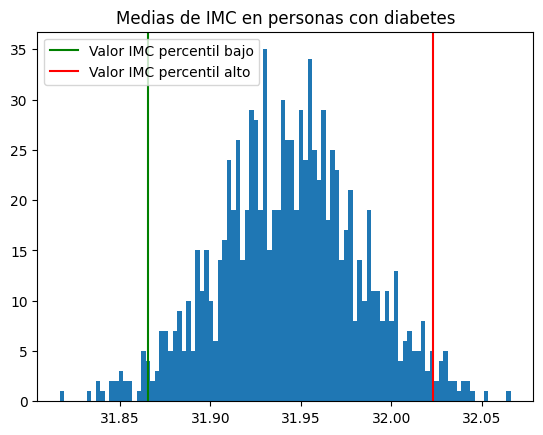

In [11]:
#Plot del resultado // 

plt.title('Medias de IMC en personas con diabetes')
plt.hist(mean_bmi_bootstrap, bins=100)
plt.axvline(x=low_pct_bmi,color='g', label='Valor IMC percentil bajo')
plt.axvline(x=high_pct_bmi,color='r', label='Valor IMC percentil alto')
plt.legend()
plt.show()